In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

In [2]:
train_data = pd.read_csv('./../data-set/application_train.csv')
test_data = pd.read_csv('./../data-set/application_test.csv')

In [3]:
train_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Displaying column name and type

In [4]:
for i in range(len(train_data.columns)):
    print(train_data.iloc[:,i].name, train_data.iloc[:,i].dtype)

print(train_data.shape)

SK_ID_CURR int64
TARGET int64
NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
WEEKDAY_APPR_PROCESS_START object
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION int64
REG_REGION_NOT_WORK_REGION int64
LIVE_REGION_NOT_WORK_REGION int64
REG_CITY_NOT_LIVE_CITY int64
REG_CITY_NOT_WORK_CITY int64
LIVE_CITY_NOT_WORK_CITY int64
ORGANIZATION_TYPE object
EXT_SOUR

# Categorizing object type columns, removing the object columns and concatenating the categorized values back in

In [5]:
list_dummy_train = train_data.select_dtypes("object").columns.tolist()
list_dummy_test = test_data.select_dtypes("object").columns.tolist()

train_dummies = pd.get_dummies(train_data[list_dummy_train])
test_dummies = pd.get_dummies(test_data[list_dummy_test])

In [6]:
#difference between 2 dummies for sync 
diff = list(set(train_dummies) - set(test_dummies))
for x in diff:
  test_dummies[x] = np.nan  
  pass


train_dummies = train_dummies.reindex(sorted(train_dummies.columns), axis=1)
test_dummies = test_dummies.reindex(sorted(test_dummies.columns), axis=1)

## Filling nulls with mean scores

In [7]:
data_train_num = train_data.select_dtypes(exclude=["object"])
data_train_num = data_train_num.fillna(data_train_num.mean())
data_train = pd.concat([data_train_num, train_dummies], axis = 1)

data_test_num = test_data.select_dtypes(exclude=["object"])
data_test_num = data_test_num.fillna(data_test_num.mean())
data_test = pd.concat([data_test_num, test_dummies], axis = 1)

# Checking for Null values

In [8]:
na_data = data_train.isnull().sum()
na_data_train = na_data.drop(na_data[na_data == 0].index).sort_values(ascending=False)
print(na_data_train)

Series([], dtype: int64)


In [9]:
na_data = data_test.isnull().sum()
na_data_test = na_data.drop(na_data[na_data == 0].index).sort_values(ascending=False)
print(na_data_test)

NAME_INCOME_TYPE_Maternity leave    48744
NAME_FAMILY_STATUS_Unknown          48744
CODE_GENDER_XNA                     48744
dtype: int64


# Filling null values with 0's if needed

In [10]:
data_train = data_train.fillna(0)
data_test = data_test.fillna(0)

In [11]:
na_data = data_test.isnull().sum()
na_data_train = na_data.drop(na_data[na_data == 0].index).sort_values(ascending=False)
print(na_data_train)

Series([], dtype: int64)


In [12]:
na_data = data_test.isnull().sum()
na_data_test = na_data.drop(na_data[na_data == 0].index).sort_values(ascending=False)
print(na_data_test)

Series([], dtype: int64)


# Checking at the target class in training set

In [13]:
target_0 = 0
target_1 = 0

for i in range(len(train_data.TARGET)):
    if train_data.TARGET[i] == 0:
        target_0 += 1
    else:
        target_1 += 1

target_class = train_data.TARGET.unique()
target_list =[target_1, target_0]

d = {'target':target_class, 'count':target_list}
target_g = pd.DataFrame(d)
target_g

,target,count
0,1,24825
1,0,282686


Text(0.5,1,'Total number of Target Instances')

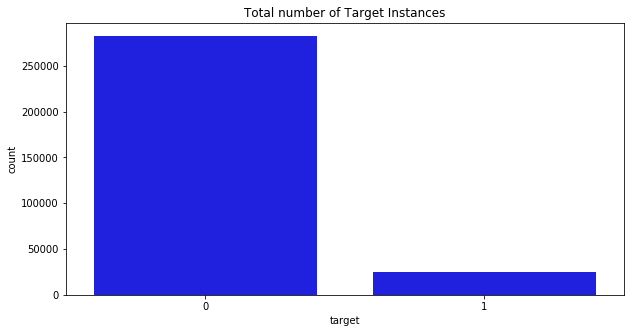

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='target', y='count', data=target_g, color='b')
ax.set_title('Total number of Target Instances')

# Applying SMOTE on Training Set

In [15]:
X_train = data_train
X_train = X_train.drop(['TARGET'], axis=1)
Y_train = data_train.TARGET

In [16]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, Y_train)

Using TensorFlow backend.


In [17]:
target_0 = 0
target_1 = 0

for i in range(len(y_res)):
    if y_res[i] == 0:
        target_0 += 1
    else:
        target_1 += 1

target_class = train_data.TARGET.unique()
target_list =[target_1, target_0]

d = {'target':target_class, 'count':target_list}
target_g = pd.DataFrame(d)
target_g

,target,count
0,1,282686
1,0,282686


Text(0.5,1,'Total number of Target Instances')

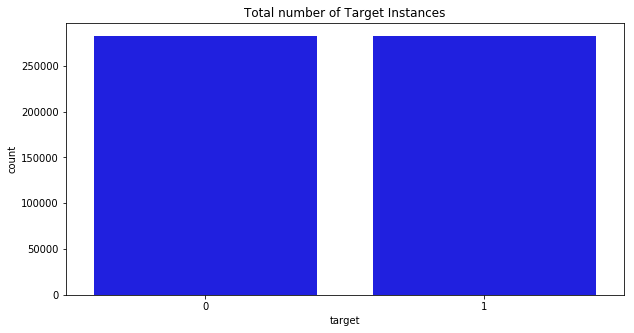

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='target', y='count', data=target_g, color='b')
ax.set_title('Total number of Target Instances')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaling = MinMaxScaler()
X_res = scaling.fit_transform(X_res)
X_test = scaling.fit_transform(data_test)

X_train, X_validate, y_train, y_validate = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

c:\users\tony\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
val_pred = logr.predict(X_validate)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logr.score(X_validate, y_validate)))

Accuracy of logistic regression classifier on validation set: 0.70


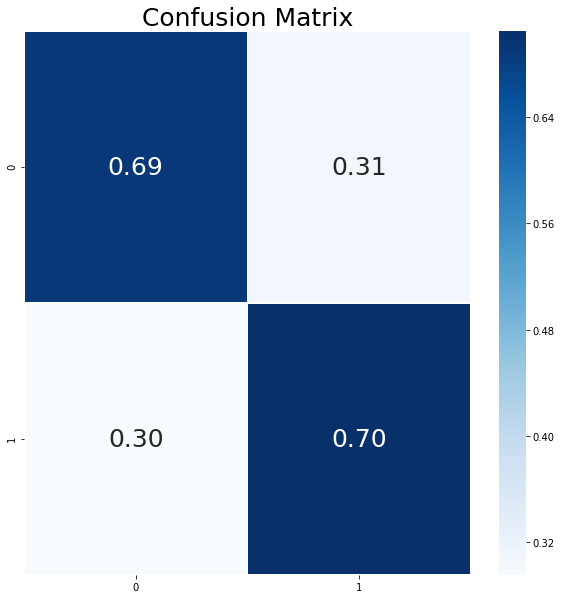

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

cm = confusion_matrix(y_validate, val_pred) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
plt.title('Confusion Matrix', fontsize = 25)
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues", annot_kws={"size": 25})

In [22]:
print(classification_report(y_validate, val_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     56536
           1       0.70      0.70      0.70     56539

    accuracy                           0.70    113075
   macro avg       0.70      0.70      0.70    113075
weighted avg       0.70      0.70      0.70    113075



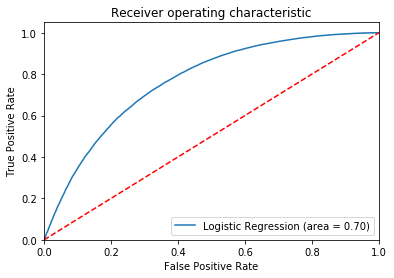

In [23]:
logit_roc_auc = roc_auc_score(y_validate, logr.predict(X_validate))
fpr, tpr, thresholds = roc_curve(y_validate, logr.predict_proba(X_validate)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [24]:
test_pred = logr.predict_proba(X_test).T[1]
index = data_test.SK_ID_CURR.astype(int)

test_pred_table = pd.DataFrame({'SK_ID_CURR': index, 'TARGET': test_pred})

In [25]:
test_pred_table

,SK_ID_CURR,TARGET
0,100001,0.428973
1,100005,0.817951
2,100013,0.256618
3,100028,0.276950
4,100038,0.604239
5,100042,0.176817
6,100057,0.173518
7,100065,0.576262
8,100066,0.157956
9,100067,0.657344
